In [63]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
%matplotlib inline
from tensorflow import keras

In [64]:
image_train = pd.read_csv('train.csv')
image_test = pd.read_csv('test.csv')

In [65]:
image_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
x_test = image_test.iloc[:,:].values

In [67]:
image_train.shape

(42000, 785)

In [68]:
x_train = image_train.iloc[:,1:].values
y_train = image_train.iloc[:,0].values

In [69]:
x_train = x_train/255
x_test = x_test/255

In [70]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [72]:
x_train.shape

(42000, 784)

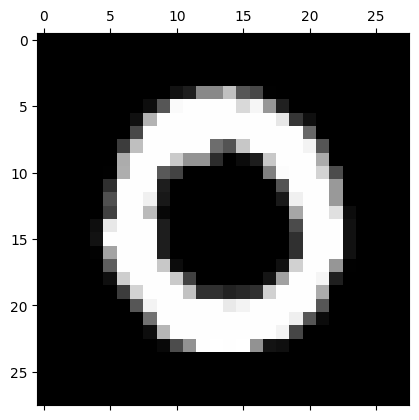

In [73]:
# Reshape the 1D array into a 2D array
image_matrix = x_train[1].reshape((28, 28))
# Display the reshaped image using matshow
plt.matshow(image_matrix, cmap='gray') 
plt.show()


In [74]:
y_train[1]

0

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.9139
Epoch 2/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1434 - accuracy: 0.9585
Epoch 3/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1017 - accuracy: 0.9701
Epoch 4/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9770
Epoch 5/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9823


In [76]:
y_predicted = model.predict(x_test)


875/875 [==============================] - 1s 2ms/step


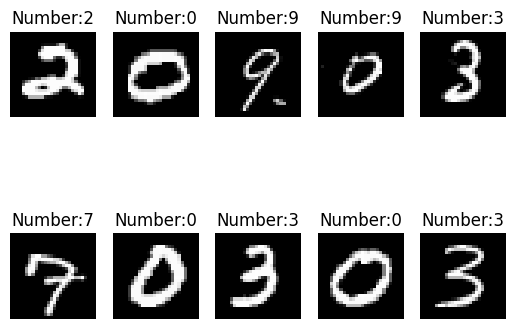

In [77]:
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns, i+1 is the current subplot index
    plt.title(f'Number:{np.argmax(y_predicted[i])}')
    
    image_matrix = x_test[i].reshape((28, 28))
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()
